In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob

In [8]:
plots = "/Users/benplatten/workspace/UvA_Thesis/FINAL_REPORT/plots/results/"

In [53]:
sns.set_context("paper")

In [ ]:
# save viz template
title=
name=
sns.set_context("paper")

plot = ## .set_title(title)

fig = plot.get_figure()
fig.savefig(f"{plots}{name}.png",bbox_inches='tight') 

In [2]:
from more_itertools import unique_everseen
from collections import Counter


def make_nice_string(s):
    N= s.split('-')
    NU= list(unique_everseen(N))
    NC= Counter(N)
    NN = [p+'-'+str(NC[p]) for p in NU if p !='']
    return ' '.join(NN)

## Main results table 

In [9]:
# model: reward function training
#rows = problem sets
# cols = average reward, % acceptable 

In [108]:
data = pd.read_csv("test_data/test_data.csv")

set_sort = ['shifts_easy_ratio_mixed', 
            'shifts_easy_ratio_above', 
            'shifts_medium_ratio_mixed', 
            'shifts_medium_ratio_above',
            'shifts_hard_ratio_mixed', 
            'shifts_hard_ratio_above',
            'shifts_extrahard_ratio_mixed', 
            'shifts_extrahard_ratio_above', 
            'shifts_xxhard_ratio_mixed',
            'shifts_xxhard_ratio_above']

set_dict = {'shifts_easy_ratio_mixed':'Max shifts 8, average shift-emp ratio', 
            'shifts_easy_ratio_above':'Max shifts 8, high shift-emp ratio', 
            'shifts_medium_ratio_mixed':'Max shifts 14, average shift-emp ratio', 
            'shifts_medium_ratio_above':'Max shifts 14, high shift-emp ratio',
            'shifts_hard_ratio_mixed':'Max shifts 18, average shift-emp ratio', 
            'shifts_hard_ratio_above':'Max shifts 18, high shift-emp ratio',
            'shifts_extrahard_ratio_mixed':'Max shifts 23, average shift-emp ratio', 
            'shifts_extrahard_ratio_above':'Max shifts 23, high shift-emp ratio', 
            'shifts_xxhard_ratio_mixed':'Max shifts 30, average shift-emp ratio',
            'shifts_xxhard_ratio_above':'Max shifts 30, high shift-emp ratio'}

data['Training Set'] = data['set'].replace(set_dict)

mod_dict = {'random_0':'Random agent',
            'step_8':'Step reward function, max shifts (train) 8',
            'stepbonus_8':'Step Bonus reward function, max shifts (train) 8',
            'terminal_8':'Terminal reward function, max shifts (train) 8'}

data['Model'] = data['model'].replace(mod_dict)

data['Average Reward'] = data.reward

data['acceptable']= [1 if i == 1 else 0 for i in data['reward'].round(6)]


In [4]:
table = data[['Model','Training Set','Average Reward','acceptable']].groupby(['Model','Training Set']).agg({'Average Reward': 'mean',
                                                                                               'acceptable':['sum','count']
                                                                                                    })

#.mean()#.reset_index()

table['Average Reward'] = table['Average Reward'].round(2)
table['% Acceptable'] = (table[('acceptable','sum')] / table[('acceptable','count')]) * 100
table.columns = table.columns.get_level_values(0)
table.drop(['acceptable','acceptable'],axis=1,inplace=True)
table.columns = table.columns.get_level_values(0)
table.tail()


Average Reward  \
Model                                          Training Set                                             
Terminal reward function, max shifts (train) 8 Max shifts 23, high shift-emp ratio               0.02   
                                               Max shifts 30, average shift-emp ratio            0.01   
                                               Max shifts 30, high shift-emp ratio               0.01   
                                               Max shifts 8, average shift-emp ratio             0.25   
                                               Max shifts 8, high shift-emp ratio                0.18   

                                                                                       % Acceptable  
Model                                          Training Set                                          
Terminal reward function, max shifts (train) 8 Max shifts 23, high shift-emp ratio              0.0  
                                               Max shifts 30, average shift-emp ratio           0.0  
                                               Max shifts 30, high shift-emp ratio              0.0  
                                               Max shifts 8, average shift-emp ratio            8.0  
                                               Max shifts 8, high shift-emp ratio               0.0

In [5]:
#ltable =table.interruptie_volgorde.apply(make_nice_string)
t= table.to_latex()

print(t)

\begin{tabular}{llrr}
\toprule
                                               &                                    &  Average Reward &  \% Acceptable \\
Model & Training Set &                 &               \\
\midrule
Random agent & Max shifts 14, average shift-emp ratio &            0.54 &          22.8 \\
                                               & Max shifts 14, high shift-emp ratio &            0.38 &           4.8 \\
                                               & Max shifts 18, average shift-emp ratio &            0.56 &          22.8 \\
                                               & Max shifts 18, high shift-emp ratio &            0.40 &           2.4 \\
                                               & Max shifts 23, average shift-emp ratio &            0.55 &          19.2 \\
                                               & Max shifts 23, high shift-emp ratio &            0.42 &           2.8 \\
                                               & Max shifts 30, average s

## MAIN RESULTS: reward vs difficulty

In [112]:
def AverageRewardvsProblemComplexityData(data):
    data[['reward_function', 'train_size']] = data['model'].str.split('_', 1, expand=True)
    #data[['reward_function', 'train_size']] = data['model'].str.split('_', 0, expand=True)
    data.drop(['model'],axis=1,inplace=True)

    #data = data[data['reward_function']=='step']

    data.reward_function = data.reward_function.str.title()
    data.reward_function = data.reward_function.str.replace('Stepbonus', 'Step Bonus', regex=False)
    data.columns = ['problem','Reward','seed','set','ratio','Reward Function','train_size']

    conditions = [data['set'] == 'shifts_easy_ratio_mixed',              
                data['set'] == 'shifts_medium_ratio_mixed',              
                data['set'] == 'shifts_hard_ratio_mixed',
                data['set'] == 'shifts_extrahard_ratio_mixed',
                data['set'] == 'shifts_xxhard_ratio_mixed',
                # data['set'] == 'shifts_easy_ratio_above',
                # data['set'] == 'shifts_medium_ratio_above',
                # data['set'] == 'shifts_hard_ratio_above',
                # data['set'] == 'shifts_extrahard_ratio_above',
            ]
    #outputs = [1,2,3,4,5,6,7,8]
    #outputs = ['Max shifts 08', 'Max shifts 14','Max shifts 18','Max shifts 23','Max shifts 30']
    outputs = ['08',14,18,23,30]
    X = np.select(conditions, outputs, 'Other')
    data['Problem Complexity (max shifts)'] = X

    hmm = data.groupby(['Reward Function','Problem Complexity (max shifts)']).agg({
                                        'Reward':'mean'
                                        }).reset_index()

    return hmm

In [113]:
data = pd.read_csv("test_data/test_data.csv")

data['ratio'] = data['set'].apply(lambda x: x.split('_')[3])
data = data[data['ratio']=='mixed']

ARvPC_data = AverageRewardvsProblemComplexityData(data)
#ARvPC_data.head()

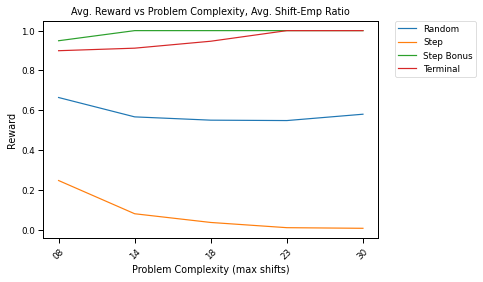

In [114]:
name = 'reward_vs_complexity_average'
title = 'Avg. Reward vs Problem Complexity, Avg. Shift-Emp Ratio'

plot = sns.lineplot(x="Problem Complexity (max shifts)", y="Reward", hue="Reward Function", data=ARvPC_data,sort=False).set_title(title)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45)

fig = plot.get_figure()
fig.savefig(f"{plots}{name}.png",bbox_inches='tight') 

In [115]:
data = pd.read_csv("test_data/test_data.csv")
data['ratio'] = data['set'].apply(lambda x: x.split('_')[3])
data = data[data['ratio']=='above']

data[['reward_function', 'train_size']] = data['model'].str.split('_', 1, expand=True)
#data[['reward_function', 'train_size']] = data['model'].str.split('_', 0, expand=True)
data.drop(['model'],axis=1,inplace=True)

#data = data[data['reward_function']=='step']

data.reward_function = data.reward_function.str.title()
data.reward_function = data.reward_function.str.replace('Stepbonus', 'Step Bonus', regex=False)

data.columns = ['problem','Reward','seed','set','ratio','Reward Function','train_size']

conditions = [
            data['set'] == 'shifts_easy_ratio_above',
            data['set'] == 'shifts_medium_ratio_above',
            data['set'] == 'shifts_hard_ratio_above',
            data['set'] == 'shifts_extrahard_ratio_above',
            data['set'] == 'shifts_xxhard_ratio_above',
        ]
#outputs = [1,2,3,4,5,6,7,8]
#outputs = ['Max shifts 8, avg ratio','Max shifts 14, avg ratio', 'Max shifts 18, avg ratio', 'Max shifts 23, avg ratio', \
#           'Max shifts 8, above avg ratio', 'Max shifts 14, above avg ratio', 'Max shifts 18, above avg ratio',  'Max shifts 23, above avg ratio']
outputs = ['08',14,18,23,30]
X = np.select(conditions, outputs, 'Other')
data['Problem Complexity (max shifts)'] = X

chart_data2 = data.groupby(['Reward Function','Problem Complexity (max shifts)']).agg({
                                    'Reward':'mean'
                                    }).reset_index()

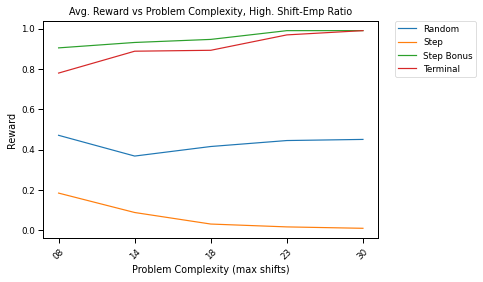

In [116]:
name = 'reward_vs_complexity_high'
title = 'Avg. Reward vs Problem Complexity, High. Shift-Emp Ratio'

plot = sns.lineplot(x="Problem Complexity (max shifts)", y="Reward", hue="Reward Function", data=chart_data2,sort=False).set_title(title)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45)

fig = plot.get_figure()
fig.savefig(f"{plots}{name}.png",bbox_inches='tight') 

## % Acceptable 

In [60]:
# plot percentage of problems with reward == 1

In [117]:
data = pd.read_csv("test_data/test_data.csv")
data['ratio'] = data['set'].apply(lambda x: x.split('_')[3])
data = data[data['ratio']=='above']
data[['reward_function', 'train_size']] = data['model'].str.split('_', 1, expand=True)
#data[['reward_function', 'train_size']] = data['model'].str.split('_', 0, expand=True)
data.drop(['model'],axis=1,inplace=True)

data.reward_function = data.reward_function.str.title()
data.reward_function = data.reward_function.str.replace('Stepbonus', 'Step Bonus', regex=False)

data.reward = data.reward.round(6)
data['acceptable']= [1 if i == 1 else 0 for i in data['reward']]

data.columns = ['problem','Reward','seed','set','ratio','Reward Function','train_size','acceptable']

conditions = [
            data['set'] == 'shifts_easy_ratio_above',
            data['set'] == 'shifts_medium_ratio_above',
            data['set'] == 'shifts_hard_ratio_above',
            data['set'] == 'shifts_extrahard_ratio_above',
            data['set'] == 'shifts_xxhard_ratio_above',
        ]
#outputs = [1,2,3,4,5,6,7,8]
#outputs = ['Max shifts 8, avg ratio','Max shifts 14, avg ratio', 'Max shifts 18, avg ratio', 'Max shifts 23, avg ratio', \
#           'Max shifts 8, above avg ratio', 'Max shifts 14, above avg ratio', 'Max shifts 18, above avg ratio',  'Max shifts 23, above avg ratio']
outputs = ['08',14,18,23,30]
X = np.select(conditions, outputs, 'Other')
data['Problem Complexity (max shifts)'] = X

hmm = data.groupby(['Reward Function','Problem Complexity (max shifts)']).agg({
                                    'acceptable':['sum','count']
                                    }).reset_index()

hmm['% Acceptable'] = (hmm[('acceptable','sum')] / hmm[('acceptable','count')]) * 100

chart_data3 = hmm[['Reward Function','Problem Complexity (max shifts)','% Acceptable']]
chart_data3.columns = chart_data3.columns.get_level_values(0)

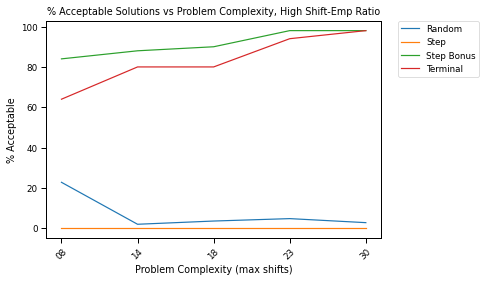

In [118]:
name = 'acceptable_vs_complexity_high'
title = '% Acceptable Solutions vs Problem Complexity, High Shift-Emp Ratio'


plot = sns.lineplot(x="Problem Complexity (max shifts)", y="% Acceptable", hue="Reward Function", data=chart_data3,sort=False).set_title(title)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45)

fig = plot.get_figure()
fig.savefig(f"{plots}{name}.png",bbox_inches='tight') 

In [119]:
data = pd.read_csv("test_data/test_data.csv")
data['ratio'] = data['set'].apply(lambda x: x.split('_')[3])
data = data[data['ratio']=='mixed']
data[['reward_function', 'train_size']] = data['model'].str.split('_', 1, expand=True)
#data[['reward_function', 'train_size']] = data['model'].str.split('_', 0, expand=True)
data.drop(['model'],axis=1,inplace=True)

data.reward_function = data.reward_function.str.title()
data.reward_function = data.reward_function.str.replace('Stepbonus', 'Step Bonus', regex=False)

data.reward = data.reward.round(6)
data['acceptable']= [1 if i == 1 else 0 for i in data['reward']]

data.columns = ['problem','Reward','seed','set','ratio','Reward Function','train_size','acceptable']

conditions = [
            data['set'] == 'shifts_easy_ratio_mixed',
            data['set'] == 'shifts_medium_ratio_mixed',
            data['set'] == 'shifts_hard_ratio_mixed',
            data['set'] == 'shifts_extrahard_ratio_mixed',
            data['set'] == 'shifts_xxhard_ratio_mixed',
        ]
#outputs = [1,2,3,4,5,6,7,8]
#outputs = ['Max shifts 8, avg ratio','Max shifts 14, avg ratio', 'Max shifts 18, avg ratio', 'Max shifts 23, avg ratio', \
#           'Max shifts 8, above avg ratio', 'Max shifts 14, above avg ratio', 'Max shifts 18, above avg ratio',  'Max shifts 23, above avg ratio']
outputs = ['08',14,18,23,30]
X = np.select(conditions, outputs, 'Other')
data['Problem Complexity (max shifts)'] = X

hmm = data.groupby(['Reward Function','Problem Complexity (max shifts)']).agg({
                                    'acceptable':['sum','count']
                                    }).reset_index()

hmm['% Acceptable'] = (hmm[('acceptable','sum')] / hmm[('acceptable','count')]) * 100

chart_data4 = hmm[['Reward Function','Problem Complexity (max shifts)','% Acceptable']]
chart_data4.columns = chart_data4.columns.get_level_values(0)

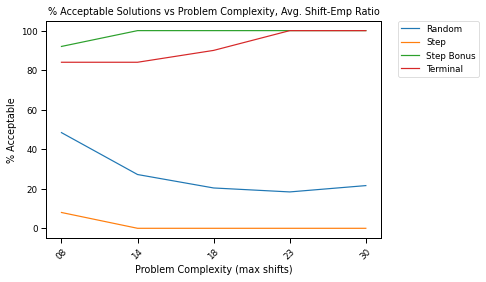

In [120]:
name = 'acceptable_vs_complexity_avg'
title = '% Acceptable Solutions vs Problem Complexity, Avg. Shift-Emp Ratio'

plot = sns.lineplot(x="Problem Complexity (max shifts)", y="% Acceptable", hue="Reward Function", data=chart_data4,sort=False).set_title(title)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45)

fig = plot.get_figure()
fig.savefig(f"{plots}{name}.png",bbox_inches='tight') 

### combine charts

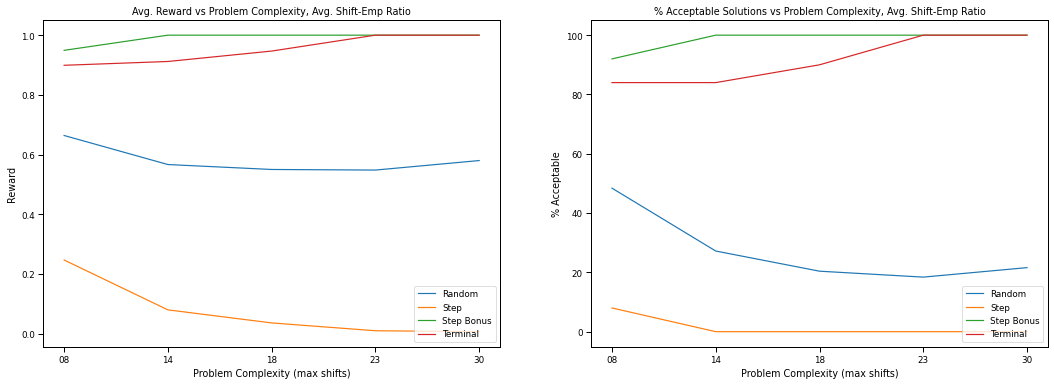

In [121]:
## Average ratio
name='combined_average'
title = 'Avg. Reward vs Problem Complexity, Avg. Shift-Emp Ratio'
title2 = '% Acceptable Solutions vs Problem Complexity, Avg. Shift-Emp Ratio'

fig, ax =plt.subplots(1,2,figsize=(18, 6), gridspec_kw={'width_ratios': [1, 1]})
sns.lineplot(x="Problem Complexity (max shifts)", y="Reward", hue="Reward Function", data=ARvPC_data, ax=ax[0]).set_title(title)
sns.lineplot(x="Problem Complexity (max shifts)", y="% Acceptable", hue="Reward Function", data=chart_data4, ax=ax[1]).set_title(title2)
ax[0].legend(loc='lower right')
ax[1].legend(loc='lower right')
#fig.show()

fig.savefig(f"{plots}{name}.png",bbox_inches='tight')

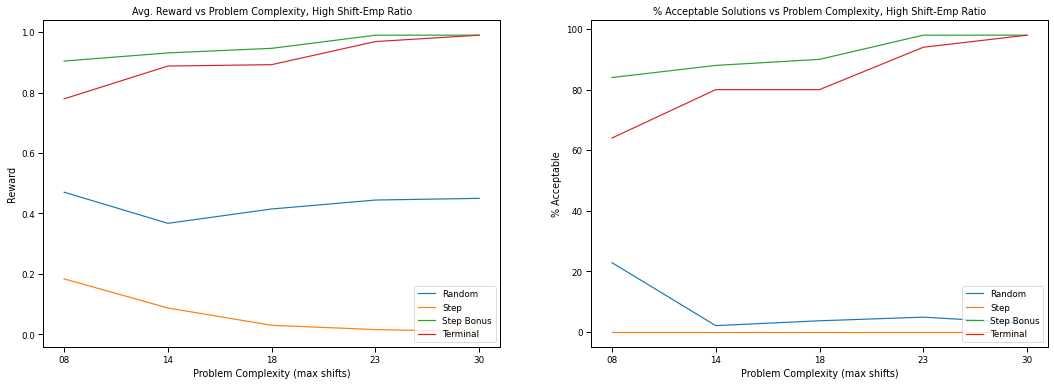

In [122]:
## High ratio

name='combined_high'
title = 'Avg. Reward vs Problem Complexity, High Shift-Emp Ratio'
title2 = '% Acceptable Solutions vs Problem Complexity, High Shift-Emp Ratio'

fig, ax =plt.subplots(1,2,figsize=(18, 6), gridspec_kw={'width_ratios': [1, 1]})
sns.lineplot(x="Problem Complexity (max shifts)", y="Reward", hue="Reward Function", data=chart_data2, ax=ax[0]).set_title(title)
sns.lineplot(x="Problem Complexity (max shifts)", y="% Acceptable", hue="Reward Function", data=chart_data3, ax=ax[1]).set_title(title2)
ax[0].legend(loc='lower right')
ax[1].legend(loc='lower right')

fig.savefig(f"{plots}{name}.png",bbox_inches='tight')

## Training data: learning curve

In [100]:
training_data = glob.glob("run_data/*.csv")
print(len(training_data))
print(training_data[10])

15
run_data/070409:29_seed21_eps10000_ms8_batchlen420_rtStep_Bonus.csv


In [101]:
chart_data = pd.DataFrame(columns=['Episode','Reward Function','Reward'])

for i in training_data:
    td = pd.read_csv(i)
    td['Reward Function'] = i.split('_',maxsplit=6)[6].split('.')[0][2:]
    td['Episode'] = td.index + 1
    td['Reward'] = td.avg_scores#.round(2)

    td['acceptable']= [1 if i == 1 else 0 for i in td['scores'].round(6)]

    data = td[['Episode','Reward Function','Reward','acceptable']]

    data['Acceptable'] = data['acceptable'].rolling(100).mean() 
    data['Acceptable'].iloc[0:99] = data['acceptable'].iloc[100]

    chart_data = chart_data.append(data)#, ignore_index=True)

#chart_data

/Users/benplatten/.pyenv/versions/3.7.2/envs/rl/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/benplatten/.pyenv/versions/3.7.2/envs/rl/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [102]:
cd = chart_data.groupby(['Episode','Reward Function']).agg({'Reward': 'mean',
                                                            'Acceptable':['sum','count']}).reset_index()


cd['% Acceptable'] = (cd[('Acceptable','sum')] / cd[('Acceptable','count')]) * 100
cd.columns = cd.columns.get_level_values(0)
cd.drop(['Acceptable', 'Acceptable'],axis=1,inplace=True)


(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

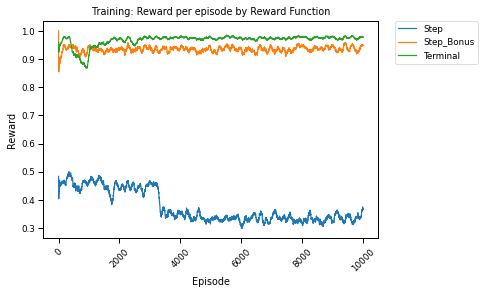

In [103]:
title = 'Training: Reward per episode by Reward Function'

sns.lineplot(x="Episode", y="Reward", hue="Reward Function", data=cd).set_title(title)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45)

(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

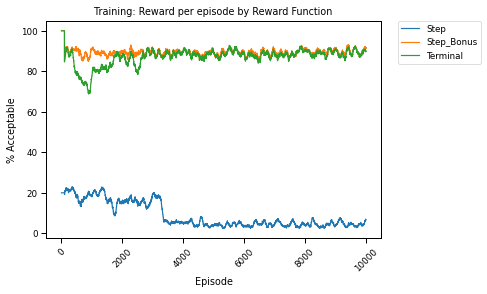

In [104]:
title = 'Training: Reward per episode by Reward Function'

sns.lineplot(x="Episode", y="% Acceptable", hue="Reward Function", data=cd).set_title(title)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45)

/Users/benplatten/.pyenv/versions/3.7.2/envs/rl/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


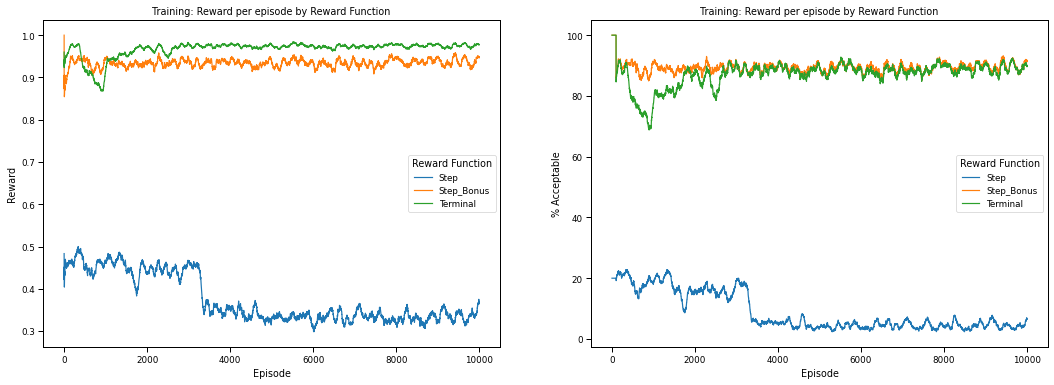

In [107]:
## training combined
name='combined_training'
title = 'Training: Reward per episode by Reward Function'
title2 = 'Training: Reward per episode by Reward Function'

fig, ax =plt.subplots(1,2,figsize=(18, 6), gridspec_kw={'width_ratios': [1, 1]})
sns.lineplot(x="Episode", y="Reward", hue="Reward Function", data=cd, ax=ax[0]).set_title(title)
sns.lineplot(x="Episode", y="% Acceptable", hue="Reward Function", data=cd, ax=ax[1]).set_title(title2)
#ax[0].legend(loc='lower right')
#ax[1].legend(loc='lower right')
fig.show()

#fig.savefig(f"{plots}{name}.png",bbox_inches='tight')